In [1]:
# Import required libraries
import numpy as np                # Mathematical functions
import pandas as pd               # data manipulation
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns
import openpyxl as pxl            # reading excel file

In [2]:
# Load the data using your own file path
data = pd.read_excel("C:\\Users\\ADMIN\\solar_battery savings\\solar-savings\\Dataset\\Junior Data Analyst_Data.xlsx", parse_dates=['date'])

# View the first five values of the dataset
data.head()

,hour,date,solar,electricity
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [3]:
print(data.dtypes)


hour                    int64
date           datetime64[ns]
solar                 float64
electricity           float64
dtype: object


In [4]:
# Data Cleaning
# 1. Ensure the date is in the correct datetime format
data['date'] = pd.to_datetime(data['date'])

# 2. Check for missing values
missing_vals = data.isnull().sum()
print("Missing values:", missing_vals)

Missing values: hour           0
date           0
solar          0
electricity    0
dtype: int64


In [5]:
# 3. Check for duplicates
dups = data.duplicated().sum()
print("Duplicates:", dups)

Duplicates: 0


In [6]:
# Calculate avg solar energy and electricity usage each hour
hourly_avg = data.groupby('hour').agg({'solar': 'mean', 'electricity': 'mean'})
print(hourly_avg)

         solar  electricity
hour                       
0     0.000000     0.816471
1     0.035753     0.401552
2     0.000000     0.250623
3     0.000000     0.407688
4     0.078559     0.552038
5     0.270625     0.610852
6     0.722868     2.084071
7     1.394885     1.788123
8     2.206044     1.798899
9     2.941512     1.681553
10    3.504041     1.807175
11    3.751915     1.685425
12    3.495879   128.000444
13    3.012649     1.512797
14    2.380767     1.249093
15    1.609068     1.356370
16    0.790964     1.566312
17    0.366649     2.495499
18    0.160652     6.140079
19    0.047186     6.055943
20    0.012912     4.843858
21    0.008934     2.732926
22    0.010126     4.569542
23    0.000000     1.097558


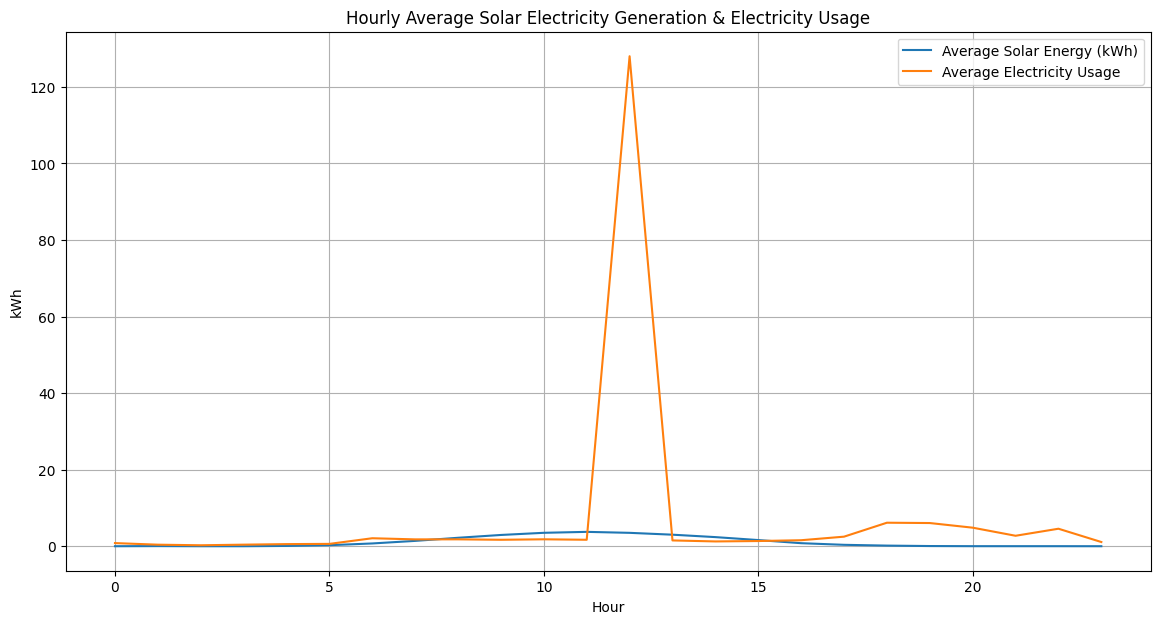

In [7]:
# Plot the averages
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_avg, x='hour', y='solar', label='Average Solar Energy (kWh)') 
sns.lineplot(data=hourly_avg, x='hour', y='electricity', label='Average Electricity Usage')
plt.xlabel('Hour')
plt.ylabel('kWh')
plt.title('Hourly Average Solar Electricity Generation & Electricity Usage')
plt.legend()
plt.grid(True)
plt.show()